# Przykład z dokumentacji nr 1

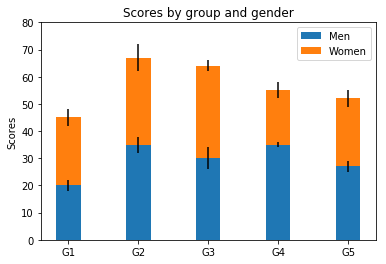

In [2]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

# Przykład z dokumentacji nr 2

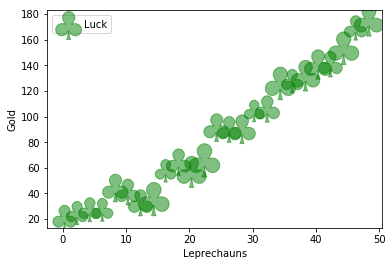

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc='upper left')
plt.show()

# Przykład z AiSD


In [10]:
def gaussj(a, b, n, m):
    
    
    indxc = []
    indxr = []
    ipiv = []
    
    for j in range(n):
        ipiv.append(0)
        
    for i in range(n):
        big = 0.0
        
        #szukanie elementu ,,obracająceg"
        for j in range(n):
            if ipiv[j] != 1:
                for k in range(n):
                    if ipiv[k] == 0:
                        if abs(a[j][k]) >= big:
                            big=abs(a[j][k])
                            irow=j
                            icol=k
                            
                            #print("big = ",big,"irow = ",irow,"icol = ",icol)
                            
        ipiv[icol]=ipiv[icol]+1
    
        #zamiana wierszy
        if (irow != icol):
            #print("zamiana")
            for l in range(n): a[irow][l],a[icol][l] = a[icol][l],a[irow][l]
            b[irow],b[icol] = b[icol],b[irow]
            
        indxr.append(irow);
        indxc.append(icol);
    
    
        #print("row = ",indxr,"col = ",indxc);
    
    
        #mnożenie przez element odwrotny
        
        if (a[icol][icol]) == 0.0: raise ValueError('Singular Matrix')
    
        pivinv=1.0/a[icol][icol]
        a[icol][icol]=1.0
    
    
        for l in range(n): a[icol][l] *= pivinv
        b[icol] *= pivinv
             
            
        
        for ll in range(n):
            if ll != icol:
                dum = a[ll][icol]
                a[ll][icol]=0.0
                
                for l in range(n): a[ll][l] -= a[icol][l]*dum
                b[ll] -= b[icol]*dum
    
    for l in reversed(range(n-1)):
        if (indxr[l] != indxc[l]):
            #print(l)
            #print(mat1)
            for k in range(n): a[k][indxr[l]],a[k][indxc[l]]=a[k][indxc[l]],a[k][indxr[l]]
            
    

In [11]:
import timeit
import time

dane = []
wyniki = []


import matplotlib.pyplot as plt


#setup = """
import random
import numpy as np
random.seed

for r in range(100):
    
    size = random.randrange(2, 100, 1)
    mat1 = np.random.rand(size,size)
    mat2= []
    for o in range(size):
        liczba = random.randrange(0, 9, 1)
        mat2.append(liczba)

#"""
    start = time.time()
    gaussj(mat1,mat2,size,1)
    czas = time.time() - start
    dane.append(size)
    wyniki.append(czas)
#print (min(timeit.Timer(gaussj(mat1,mat2,size,1), setup=setup).repeat(7, 1000)))

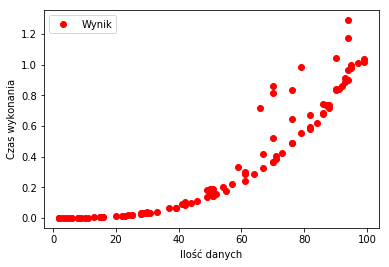

In [9]:
line = plt.plot(dane, wyniki,'ro',label = "Wynik")
plt.xlabel("Ilość danych")
plt.ylabel("Czas wykonania")
plt.legend()